In [23]:
from bs4 import BeautifulSoup
import requests
import requests_cache
import time
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings



1: Kids & Family
2: Action & Adventure
3: Thriller
4: Comedy
5: Drama
6: Sci-Fi & Fantasy
7: Horror
8: Western
9: Music Documentaries
10: Romance
11: Documentary
12: Bollywood
13: Musicals
14: Concert Films
15: Sports
16: Music Feature Films
17: Foreign
18: Independent
19: Holiday
20: Anime
21: Short Films


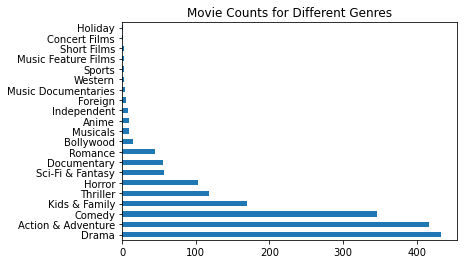

What genre of movie would you like? Please select one genre at a time.5


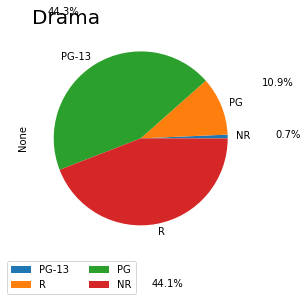

1: PG-13
2: R
3: PG
4: NR
What rating of movie do you prefer? Please select one rating at a time.2


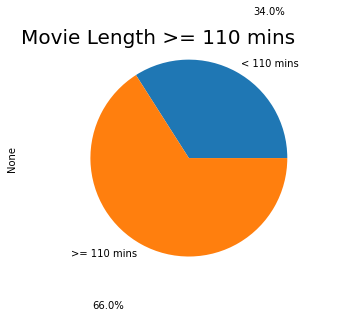

Do you prefer movie length 110 mins or longer? Yes: >=110 mins; No: <110 mins y


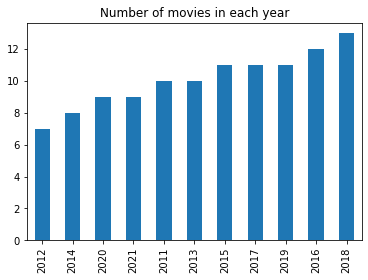

Which years of movie do you prefer? (If you are choosing multiple years, please use comma for separation, and do not include space please.) 2012,2014
Movie Recommedation List
                       Name  Rank  Year  Length Rating  Genre  \
0                   Lawless    91  2012   116.0      R  Drama   
1                      Argo    25  2012   120.0      R  Drama   
2                    Flight    27  2012   139.0      R  Drama   
3                  The Grey    64  2012   117.0      R  Drama   
4   Silver Linings Playbook   108  2012   122.0      R  Drama   
5                The Master   131  2012   138.0      R  Drama   
6              Albert Nobbs   191  2012   114.0      R  Drama   
7                      Wild   116  2014   116.0      R  Drama   
8                      Fury    34  2014   135.0      R  Drama   
9                Foxcatcher   155  2014   135.0      R  Drama   
10            The Equalizer    30  2014   132.0      R  Drama   
11              Jersey Boys    72  2014   134

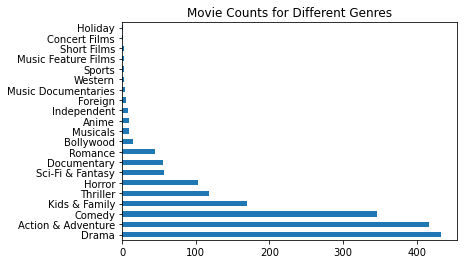

What genre of movie would you like? Please select one genre at a time.24
Invalid input. Please refer to the genre below, and select the index.
1: Kids & Family
2: Action & Adventure
3: Thriller
4: Comedy
5: Drama
6: Sci-Fi & Fantasy
7: Horror
8: Western
9: Music Documentaries
10: Romance
11: Documentary
12: Bollywood
13: Musicals
14: Concert Films
15: Sports
16: Music Feature Films
17: Foreign
18: Independent
19: Holiday
20: Anime
21: Short Films
Which genre of movie do you prefer?1


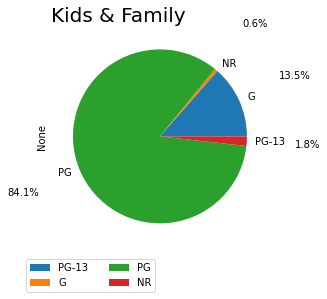

1: PG-13
2: G
3: PG
4: NR
What rating of movie do you prefer? Please select one rating at a time.erewitud
Invalid input. Please refer to the ratings below, and select the index.
1: PG-13
2: G
3: PG
4: NR
Which rating of movie do you prefer?9
Invalid input. Please refer to the ratings below, and select the index.
1: PG-13
2: G
3: PG
4: NR
Which rating of movie do you prefer?3


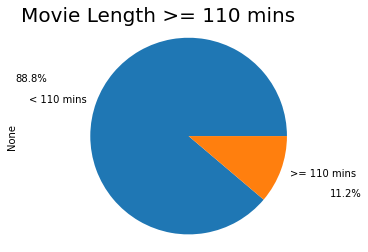

Do you prefer movie length 110 mins or longer? Yes: >=110 mins; No: <110 mins n


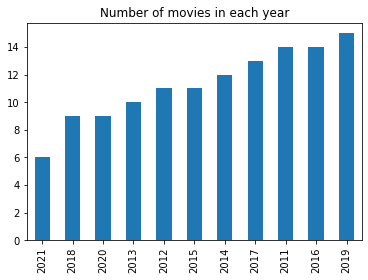

Which years of movie do you prefer? (If you are choosing multiple years, please use comma for separation, and do not include space please.) 2022
Please refer to the range below, and select the year from it.
Range:  [2011, 2012, 2013, 2015, 2016, 2017, 2018, 2014, 2019, 2021, 2020]
Which years of movie do you prefer?2021,2012
Movie Recommedation List
                                  Name  Rank  Year  Length Rating  \
0                     Ron's Gone Wrong    47  2021   107.0     PG   
1             Clifford the Big Red Dog    26  2021    96.0     PG   
2          Peter Rabbit 2: The Runaway    31  2021    94.0     PG   
3                              Encanto    15  2021   103.0     PG   
4               Tom & Jerry: The Movie    29  2021   101.0     PG   
5                           The Rescue   123  2021    84.0     PG   
6                   Hotel Transylvania    16  2012    91.0     PG   
7                                Brave     7  2012    95.0     PG   
8       Diary of a Wimpy Ki

In [27]:
import warnings
warnings.filterwarnings('ignore')
while True:
    df = pd.read_csv('/Users/weiningxu/Downloads/UMICH/SI507/FinalProject/movie_list.csv')
    #print(df)
   
    genre = pd.unique(df['Genre'])
    genre_number = []
    genre_list = []
    for i in range(0, len(genre)):
        genre_number.append(i+1)
        genre_list.append((str(i+1)+": "+genre[i]))
    print("\n".join(map(str, genre_list)))

    df.Genre.value_counts().plot.barh()
    plt.title('Movie Counts for Different Genres')
    plt.show()
    
    answer = input('What genre of movie would you like? Please select one genre at a time.')

    while True:
        if ',' in answer:
            print('Please select one genre at a time. Refer to the genre below, and select the index.')
            print("\n".join(map(str, genre_list)))
            answer = input('Which genre of movie do you prefer?')
        else:
            answer = answer
        if (len(answer)==1 or len(answer)==2):
            if answer.strip().isdigit() and int(answer) in genre_number:
                answer = answer
                break
            else:
                print('Invalid input. Please refer to the genre below, and select the index.')
                print("\n".join(map(str, genre_list)))
                answer = input('Which genre of movie do you prefer?')
        else:
            print('Invalid input. Please refer to the genre below, and select the index.')
            print("\n".join(map(str, genre_list)))
            answer = input('Which genre of movie do you prefer?')
    genre_key = genre[int(answer)-1]
    #key = genre[int(answer)-1]
    n_df = df.loc[df['Genre'] == genre_key]
    
    if len(n_df) == 1:
        print(n_df)
    n_df.groupby('Rating').size().plot.pie(autopct='%1.1f%%',pctdistance=1.7)
    plt.title(genre[int(answer)-1],fontsize=20, loc = 'left')
    plt.legend(labels=pd.unique(n_df['Rating']), loc='upper right', 
            bbox_to_anchor=(0.5, -0.04), ncol=2)

    plt.show()

    rate = pd.unique(n_df['Rating'])
    rate_number = []
    rate_list = []
    for i in range(0, len(rate)):
        rate_number.append(i+1)
        rate_list.append((str(i+1)+": "+rate[i]))
    print("\n".join(map(str, rate_list)))
    
    answer = input('What rating of movie do you prefer? Please select one rating at a time.')
    while True:
        if ',' in answer:
            print('Please select one rating at a time. Refer to the ratings below, and select the index.')
            print("\n".join(map(str, rate_list)))
            answer = input('Which rating of movie do you prefer?')
        else:
            answer = answer
        if (len(answer)==1 or len(answer)==2):
            if answer.strip().isdigit() and int(answer) in rate_number:
                answer = answer
                break
            else:
                print('Invalid input. Please refer to the ratings below, and select the index.')
                print("\n".join(map(str, rate_list)))
                answer = input('Which rating of movie do you prefer?')
        else:
            print('Invalid input. Please refer to the ratings below, and select the index.')
            print("\n".join(map(str, rate_list)))
            answer = input('Which rating of movie do you prefer?')

    rate_key = rate[int(answer)-1]
    ne_df = n_df.loc[df['Rating'] == rate_key]

    class BinarySearchTree:
        def __init__(self):
            """ create an empty binary search tree """
            self.root = None
            
        def put(self, key, value):
            """ add a new mapping between key and value to the BST """
            if self.root:
                self.root.put(key,value)
            else:
                self.root = TreeNode(key,value)
            
        def get(self, key):
            """ retrieve the value associated with the given key """
            if self.root:
                return self.root.get(key)
            else:
                #pass
                return 
        
        def has_key(self, key):
            """ check if the node with the given key is in the tree """

            # the following assumes None is never stored with a key 
            
            return not self.get(key) is None      
        
                
        def __iter__(self):
            """ returns an iterator for the binary search tree """

            class EmptyIterator:
                def next(self):
                    raise StopIteration
                
            if self.root:
                # if the tree is not empty, just return the root's iterator
                return iter(self.root)
            else:
                # otherwise return the iterator that immediately raises
                # a StopIteration exception 
                return EmptyIterator()
            
                
    class TreeNode:
        def __init__(self, key, val):
            self.key = key
            self.val = val
            self.left = None
            self.right = None 
            
        def __iter__(self):
            """ return the iterator that iterates through the elements in the BST 
            rooted at this node in an inorder sequence """
            
            if self.left:
                # The following iterates through all the nodes in the left subtree. 
                
                # The first thing that python does when the for loop is encountered
                # is to obtain an iterator object for the left subtree.  
                # This is done ("under the covers") by recursively calling 
                # the __iter__ method on the left child. 
                for elt in self.left:         
                    yield elt
                    
            # at this point we "visit" the current node
            yield (self.key, self.val)
            
            if self.right:
                # we now visit all the nodes in the right subtree 
                for elt in self.right:
                    yield elt
                
        def put(self, key, val):
            list = []
            """ add a new mapping between key and value in the tree """
           
            if self.key > key:            # key belongs in left subtree 
                if self.left:
                    self.left.put(key,val)
                else:                       # left subtree is empty
                    self.left = TreeNode(key,val)
            else:                           # key belongs in right subtree 
                if self.right:
                    self.right.put(key,val)
                else:                       # right subtree is empty
                    self.right = TreeNode(key,val)
            return list        
        def get(self, key):
            """ get the value associated with the key """ 
            
            if self.key == key:
                return self.val

            if self.key > key:              # key should be in the left subtree
                if self.left:
                    return self.left.get(key)

            else:                           # key should be in the right subtree
                if self.right:
                    return self.right.get(key)
    
    def print_tree(root):
        '''Print the tree rooted at root.'''
        print_helper(root, "")


    def print_helper(root, indent):
        '''Print the tree rooted at BTNode root. Print str indent (which
        consists only of whitespace) before the root value; indent more for the
        subtrees so that it looks nice.'''
        if root is not None:
            print_helper(root.right, indent + "   ")
            print(indent + str(root.key))
            print_helper(root.left, indent + "   ")

    tree = BinarySearchTree()
    length = pd.unique(ne_df["Length"])
    for i in length:
        tree.put(i, ne_df.loc[ne_df["Length"]==i].values.tolist())
    #print_tree(tree.root)

    temp = ne_df
    temp['length110'] = np.where(temp['Length']>=110, '>= 110 mins', '< 110 mins')
    temp.groupby('length110').size().plot.pie(autopct='%1.1f%%',pctdistance=1.7)
    #plt.pie(temp['length110'].value_counts(),labels=pd.unique(temp['length110'],autopct='%1.1f%%', labeldistance = 0.9))
    plt.title('Movie Length >= 110 mins',fontsize=20, loc = 'left')
    plt.axis('equal')

    plt.show()

    answer = input('Do you prefer movie length 110 mins or longer? Yes: >=110 mins; No: <110 mins ')
    yes_length = length[length>=110]
    no_length = length[length<110]
    yes = {'yes', 'y', 'yup', 'yep', 'yap', 'sure'}
    no = {'no', 'n', 'nope', 'nah'}
    new_df =[]
    list = []
    while True:

        answer = answer.lower()
        if answer in yes:
            length_key = '>= 110 mins'
            for i in yes_length:
                new_df.append(tree.get(i))

            for i in range(0,len(new_df)):
                if len(new_df[i])>1:
                    for q in range(0, len(new_df[i])):
                        list.append(new_df[i][q])
 
            break
        elif answer in no:
            length_key = '< 110 mins'
            for i in no_length:
                new_df.append(tree.get(i))

            for i in range(0,len(new_df)):
                if len(new_df[i])>1:

                    for q in range(0, len(new_df[i])):
                        
                        list.append(new_df[i][q])

            break
        else: 
            print("Invalid answer, please enter 'yes' or 'no'!")
            answer = input('Do you prefer movie length 110 mins or longer? Yes: >=100 mins; No: <100 mins ')
    new_df = pd.DataFrame (list, columns = ['URL','Rank','Name','Year','Length','Rating','Genre','Description', 'iTunesURL'])

    year_tree = BinarySearchTree()
    year = pd.unique(new_df['Year']).tolist()

    for i in year:
        year_tree.put(i, new_df.loc[new_df["Year"]==i].values.tolist())
    #print_tree(year_tree.root)

    new_df.Year.value_counts().sort_values().plot.bar()
    plt.title('Number of movies in each year')
        
    plt.show()

    answer = input('Which years of movie do you prefer? (If you are choosing multiple years, please use comma for separation, and do not include space please.) ')
    list = []
    final_df = []

    while True:
        lst=[]
        if ',' in answer:
            answer = (answer.split(','))

            break
        elif int(answer) in year:
            lst.append(answer)
            answer = lst

            break
        else:
            print('Please refer to the range below, and select the year from it.')
            print('Range: ', year)
            answer = input('Which years of movie do you prefer?')

        
    for i in range(0,len(answer)):
        if int(answer[i]) in year:

            final_df.append(year_tree.get(int(answer[i])))

            for q in range(0, len(final_df[i])):

                list.append(final_df[i][q])
                

    final_df = pd.DataFrame.from_records(list, columns = ['URL','Rank','Name','Year','Length','Rating','Genre','Description', 'iTunesURL'])
    print('Movie Recommedation List')
    #print(genre_key, ', ', rate_key,', ',length_key)
    print(final_df[["Name", "Rank", "Year", "Length", "Rating", "Genre", 'iTunesURL']])  

    answer = input("Do you want to get another list of movie recommendation list?")
    if answer in yes:
        pass
    else: 
        print("Bye!")
        break